In [90]:
!pip install openpyxl
!pip install matplotlib
!pip install pandas


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
import numpy.ma as ma
import numpy as np

In [92]:
df = pd.read_excel('results.xlsx')
df

,Pipeline Depth,Cache Size (KB),Benchmark,Simulated Seconds,Simulated Instructions,Instruction Cache Miss Rate,Branch Predictions,Missed Branch Predicitons,IPC,Data Cache Miss Rate,IPS(billions)
0,7,32,Int,0.082988,184984522.0,0.000059,33389789.50,143675.75,2.230676,0.002005,2.229045
1,7,128,Int,0.107333,184984522.0,0.000056,33363197.50,143588.00,1.724303,0.000203,1.723464
2,7,256,Int,0.131754,184984522.0,0.000055,33353725.50,143547.00,1.404534,0.000194,1.404009
3,7,512,Int,0.205066,184984522.0,0.000053,33342072.00,143493.75,0.902276,0.000189,0.902074
4,10,32,Int,0.107354,184984522.0,0.000058,33368282.75,143617.25,1.723982,0.001959,1.723135
...,...,...,...,...,...,...,...,...,...,...,...
57,50,32,Float,0.275420,182984536.0,0.000055,33085997.00,143350.00,0.664385,0.001894,0.664384
58,50,2,Float,0.246067,182984536.0,0.000180,33011834.00,143440.00,0.743636,0.037021,0.743637
59,10,256,Float,0.155893,184484536.0,0.000055,33087405.75,143411.75,1.183447,0.000193,1.183401
60,10,32,Float,0.107036,184484536.0,0.000058,33089591.75,143481.75,1.723627,0.001929,1.723575


In [110]:
int_df = df[df['Benchmark']=='Int']
int_df

,Pipeline Depth,Cache Size (KB),Benchmark,Simulated Seconds,Simulated Instructions,Instruction Cache Miss Rate,Branch Predictions,Missed Branch Predicitons,IPC,Data Cache Miss Rate,IPS(billions)
0,7,32,Int,0.082988,1.849845e+08,0.000059,3.338979e+07,143675.750000,2.230676,0.002005,2.229045
1,7,128,Int,0.107333,1.849845e+08,0.000056,3.336320e+07,143588.000000,1.724303,0.000203,1.723464
2,7,256,Int,0.131754,1.849845e+08,0.000055,3.335373e+07,143547.000000,1.404534,0.000194,1.404009
3,7,512,Int,0.205066,1.849845e+08,0.000053,3.334207e+07,143493.750000,0.902276,0.000189,0.902074
4,10,32,Int,0.107354,1.849845e+08,0.000058,3.336828e+07,143617.250000,1.723982,0.001959,1.723135
5,10,128,Int,0.132606,1.853179e+08,0.000055,3.344238e+07,143594.666667,1.398031,0.000198,1.397504
6,10,256,Int,0.156186,1.849845e+08,0.000055,3.335061e+07,143536.500000,1.184749,0.000194,1.184388
7,15,2,Int,0.129839,1.849845e+08,0.000184,3.329955e+07,143642.750000,1.424717,0.036757,1.424725
8,15,32,Int,0.131769,1.849845e+08,0.000057,3.335592e+07,143613.000000,1.404382,0.001930,1.403852
9,15,64,Int,0.156198,1.849845e+08,0.000055,3.335199e+07,143561.000000,1.184656,0.001709,1.184293


In [109]:
float_df = df[df['Benchmark']=='Float']
float_df

,Pipeline Depth,Cache Size (KB),Benchmark,Simulated Seconds,Simulated Instructions,Instruction Cache Miss Rate,Branch Predictions,Missed Branch Predicitons,IPC,Data Cache Miss Rate,IPS(billions)
31,20,64,Float,0.180926,184984536.0,0.000054,33087019.00,143413.666667,1.022484,0.001685,1.022430
32,20,16,Float,0.155974,184484536.0,0.000061,33086773.25,143445.750000,1.182832,0.010826,1.182790
33,20,128,Float,0.204789,184484536.0,0.000053,33086617.75,143366.500000,0.900892,0.000193,0.900851
34,20,1,Float,0.294734,184484536.0,0.000240,33038864.25,143494.000000,0.625916,0.121626,0.625936
35,30,4,Float,0.195493,184484536.0,0.000082,32983899.75,143470.250000,0.943671,0.035465,0.943690
36,30,64,Float,0.253696,184484536.0,0.000053,33086268.00,143364.500000,0.727222,0.001681,0.727189
37,30,16,Float,0.204830,184484536.0,0.000060,33086462.75,143412.750000,0.900713,0.010443,0.900673
38,30,32,Float,0.229242,184484536.0,0.000055,33086528.75,143381.750000,0.804795,0.001890,0.804758
39,7,512,Float,0.204789,184484536.0,0.000053,33086597.00,143360.250000,0.900893,0.000189,0.900854
40,7,256,Float,0.131458,184484536.0,0.000056,33087806.75,143424.750000,1.403430,0.000192,1.403375


In [95]:
pipeline_depths = [7, 10, 15, 20, 25, 30, 40, 50]
cache_sizes = [1, 2, 4, 16, 32, 64, 128, 256, 512]

In [111]:
def get_y_axis(cache_size, benchmark_df, column):
    y_axis = np.zeros(len(pipeline_depths))
    cache_df = benchmark_df[benchmark_df['Cache Size (KB)']==cache_size]
    for index, row in cache_df.iterrows():
        y_axis[pipeline_depths.index(row['Pipeline Depth'])] = row[column]
    return y_axis

In [112]:
cache1 = get_y_axis(1, int_df, 'IPS(billions)')
cache1

array([0.        , 0.        , 0.        , 0.62813614, 0.        ,
       0.        , 0.        , 0.        ])

In [113]:
def mask_zeros(array):
    mask = ma.array(array)
    for idx, value in enumerate(array):
        if value == 0:
            mask[idx] = ma.masked
    return mask

In [114]:
intcache1 = get_y_axis(1, int_df, 'IPS(billions)')
intcache2 = get_y_axis(2, int_df, 'IPS(billions)')
intcache4 = get_y_axis(4, int_df, 'IPS(billions)')
intcache16 = get_y_axis(16, int_df, 'IPS(billions)')
intcache32 = get_y_axis(32, int_df, 'IPS(billions)')
intcache64 = get_y_axis(64, int_df, 'IPS(billions)')
intcache128 = get_y_axis(128, int_df, 'IPS(billions)')
intcache256 = get_y_axis(256, int_df, 'IPS(billions)')
intcache512 = get_y_axis(512, int_df, 'IPS(billions)')

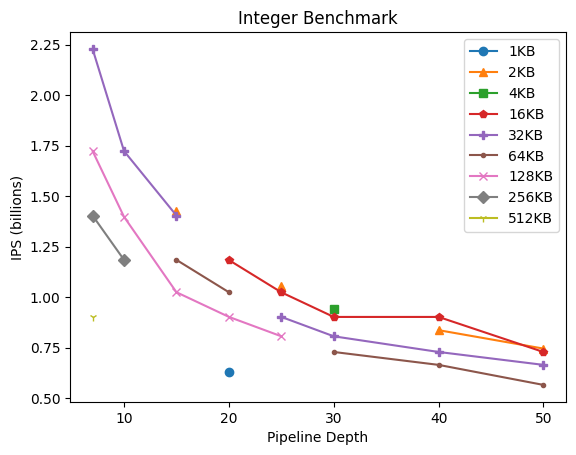

In [115]:
plt.plot(pipeline_depths, mask_zeros(intcache1), marker='o', label='1KB')
plt.plot(pipeline_depths, mask_zeros(intcache2), marker='^', label='2KB')
plt.plot(pipeline_depths, mask_zeros(intcache4), marker='s', label='4KB')
plt.plot(pipeline_depths, mask_zeros(intcache16), marker='p', label='16KB')
plt.plot(pipeline_depths, mask_zeros(intcache32), marker='P', label='32KB')
plt.plot(pipeline_depths, mask_zeros(intcache64), marker='.', label='64KB')
plt.plot(pipeline_depths, mask_zeros(intcache128), marker='x', label='128KB')
plt.plot(pipeline_depths, mask_zeros(intcache256), marker='D', label='256KB')
plt.plot(pipeline_depths, mask_zeros(intcache512), marker='1', label='512KB')
plt.legend()
plt.xlabel('Pipeline Depth')
plt.ylabel('IPS (billions)')
plt.title('Integer Benchmark')
plt.show()

In [117]:
floatcache1 = get_y_axis(1, float_df, 'IPS(billions)')
floatcache2 = get_y_axis(2, float_df, 'IPS(billions)')
floatcache4 = get_y_axis(4, float_df, 'IPS(billions)')
floatcache16 = get_y_axis(16, float_df, 'IPS(billions)')
floatcache32 = get_y_axis(32, float_df, 'IPS(billions)')
floatcache64 = get_y_axis(64, float_df, 'IPS(billions)')
floatcache128 = get_y_axis(128, float_df, 'IPS(billions)')
floatcache256 = get_y_axis(256, float_df, 'IPS(billions)')
floatcache512 = get_y_axis(512, float_df, 'IPS(billions)')

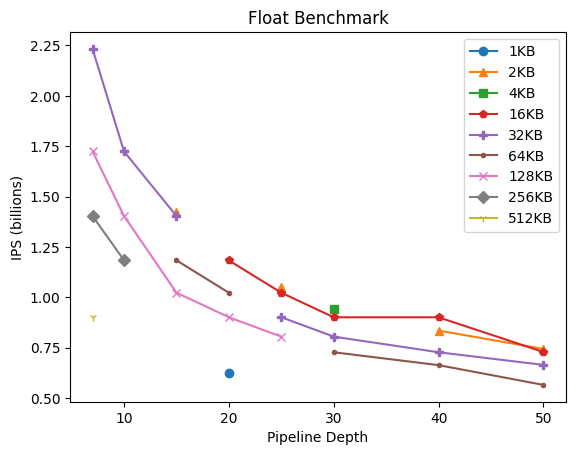

In [118]:
plt.plot(pipeline_depths, mask_zeros(floatcache1), marker='o', label='1KB')
plt.plot(pipeline_depths, mask_zeros(floatcache2), marker='^', label='2KB')
plt.plot(pipeline_depths, mask_zeros(floatcache4), marker='s', label='4KB')
plt.plot(pipeline_depths, mask_zeros(floatcache16), marker='p', label='16KB')
plt.plot(pipeline_depths, mask_zeros(floatcache32), marker='P', label='32KB')
plt.plot(pipeline_depths, mask_zeros(floatcache64), marker='.', label='64KB')
plt.plot(pipeline_depths, mask_zeros(floatcache128), marker='x', label='128KB')
plt.plot(pipeline_depths, mask_zeros(floatcache256), marker='D', label='256KB')
plt.plot(pipeline_depths, mask_zeros(floatcache512), marker='1', label='512KB')
plt.legend()
plt.xlabel('Pipeline Depth')
plt.ylabel('IPS (billions)')
plt.title('Float Benchmark')
plt.show()

In [122]:
intcache1 = get_y_axis(1, int_df, 'IPC')
intcache2 = get_y_axis(2, int_df, 'IPC')
intcache4 = get_y_axis(4, int_df, 'IPC')
intcache16 = get_y_axis(16, int_df, 'IPC')
intcache32 = get_y_axis(32, int_df, 'IPC')
intcache64 = get_y_axis(64, int_df, 'IPC')
intcache128 = get_y_axis(128, int_df, 'IPC')
intcache256 = get_y_axis(256, int_df, 'IPC')
intcache512 = get_y_axis(512, int_df, 'IPC')
intcache1

array([0.        , 0.        , 0.        , 0.62821275, 0.        ,
       0.        , 0.        , 0.        ])

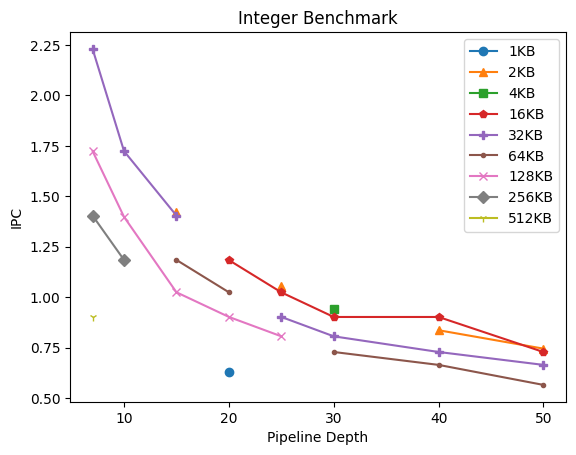

In [123]:
plt.plot(pipeline_depths, mask_zeros(intcache1), marker='o', label='1KB')
plt.plot(pipeline_depths, mask_zeros(intcache2), marker='^', label='2KB')
plt.plot(pipeline_depths, mask_zeros(intcache4), marker='s', label='4KB')
plt.plot(pipeline_depths, mask_zeros(intcache16), marker='p', label='16KB')
plt.plot(pipeline_depths, mask_zeros(intcache32), marker='P', label='32KB')
plt.plot(pipeline_depths, mask_zeros(intcache64), marker='.', label='64KB')
plt.plot(pipeline_depths, mask_zeros(intcache128), marker='x', label='128KB')
plt.plot(pipeline_depths, mask_zeros(intcache256), marker='D', label='256KB')
plt.plot(pipeline_depths, mask_zeros(intcache512), marker='1', label='512KB')
plt.legend()
plt.xlabel('Pipeline Depth')
plt.ylabel('IPC')
plt.title('Integer Benchmark')
plt.show()

In [124]:
floatcache1 = get_y_axis(1, float_df, 'IPC')
floatcache2 = get_y_axis(2, float_df, 'IPC')
floatcache4 = get_y_axis(4, float_df, 'IPC')
floatcache16 = get_y_axis(16, float_df, 'IPC')
floatcache32 = get_y_axis(32, float_df, 'IPC')
floatcache64 = get_y_axis(64, float_df, 'IPC')
floatcache128 = get_y_axis(128, float_df, 'IPC')
floatcache256 = get_y_axis(256, float_df, 'IPC')
floatcache512 = get_y_axis(512, float_df, 'IPC')

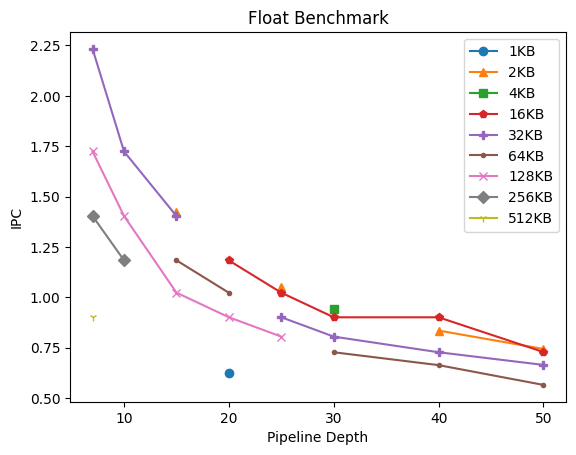

In [125]:
plt.plot(pipeline_depths, mask_zeros(floatcache1), marker='o', label='1KB')
plt.plot(pipeline_depths, mask_zeros(floatcache2), marker='^', label='2KB')
plt.plot(pipeline_depths, mask_zeros(floatcache4), marker='s', label='4KB')
plt.plot(pipeline_depths, mask_zeros(floatcache16), marker='p', label='16KB')
plt.plot(pipeline_depths, mask_zeros(floatcache32), marker='P', label='32KB')
plt.plot(pipeline_depths, mask_zeros(floatcache64), marker='.', label='64KB')
plt.plot(pipeline_depths, mask_zeros(floatcache128), marker='x', label='128KB')
plt.plot(pipeline_depths, mask_zeros(floatcache256), marker='D', label='256KB')
plt.plot(pipeline_depths, mask_zeros(floatcache512), marker='1', label='512KB')
plt.legend()
plt.xlabel('Pipeline Depth')
plt.ylabel('IPC')
plt.title('Float Benchmark')
plt.show()

In [146]:
average_icache_miss_rate = []
for i in cache_sizes:
    int_cache = get_y_axis(i, int_df, 'Instruction Cache Miss Rate')
    int_cache = int_cache[int_cache.nonzero()]
    sum = 0
    for x in int_cache:
        sum += x
    average_icache_miss_rate.append(sum/len(int_cache))
average_icache_miss_rate

[0.00023975,
 0.0001811875,
 8.175e-05,
 5.955e-05,
 5.5892857142857145e-05,
 5.35e-05,
 5.393333333333334e-05,
 5.4875000000000006e-05,
 5.3e-05]

In [148]:
average_dcache_miss_rate = []
for i in cache_sizes:
    int_cache = get_y_axis(i, int_df, 'Data Cache Miss Rate')
    int_cache = int_cache[int_cache.nonzero()]
    sum = 0
    for x in int_cache:
        sum += x
    average_dcache_miss_rate.append(sum/len(int_cache))
average_dcache_miss_rate

[0.12317725,
 0.03683960416666668,
 0.035465,
 0.0105431,
 0.0019259285714285715,
 0.0015923999999999997,
 0.00019611666666666656,
 0.00019412500000000002,
 0.00018925]

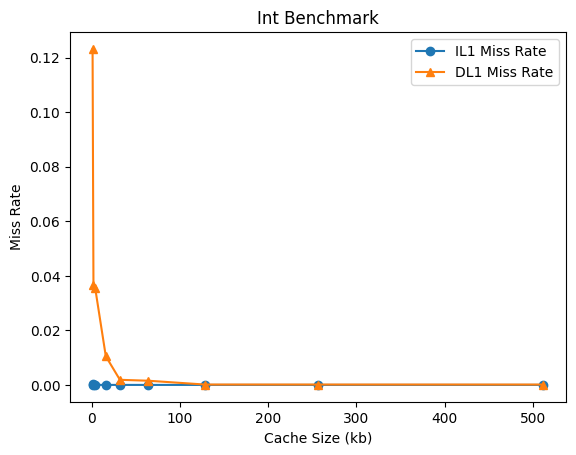

In [149]:
plt.plot(cache_sizes, average_icache_miss_rate, marker='o', label='IL1 Miss Rate')
plt.plot(cache_sizes, average_dcache_miss_rate, marker='^', label='DL1 Miss Rate')
plt.legend()
plt.xlabel('Cache Size (kb)')
plt.ylabel('Miss Rate')
plt.title('Int Benchmark')
plt.show()

In [150]:
average_icache_miss_rate = []
for i in cache_sizes:
    int_cache = get_y_axis(i, float_df, 'Instruction Cache Miss Rate')
    int_cache = int_cache[int_cache.nonzero()]
    sum = 0
    for x in int_cache:
        sum += x
    average_icache_miss_rate.append(sum/len(int_cache))
average_icache_miss_rate

[0.00023975,
 0.00018125,
 8.225e-05,
 5.9900000000000006e-05,
 5.621428571428572e-05,
 5.3916666666666665e-05,
 5.43e-05,
 5.5e-05,
 5.35e-05]

In [151]:
average_dcache_miss_rate = []
for i in cache_sizes:
    int_cache = get_y_axis(i, float_df, 'Data Cache Miss Rate')
    int_cache = int_cache[int_cache.nonzero()]
    sum = 0
    for x in int_cache:
        sum += x
    average_dcache_miss_rate.append(sum/len(int_cache))
average_dcache_miss_rate

[0.12162625,
 0.0367895625,
 0.03546525,
 0.0105203,
 0.0019092142857142856,
 0.0015531333333333338,
 0.00019455,
 0.00019299999999999997,
 0.00018875]

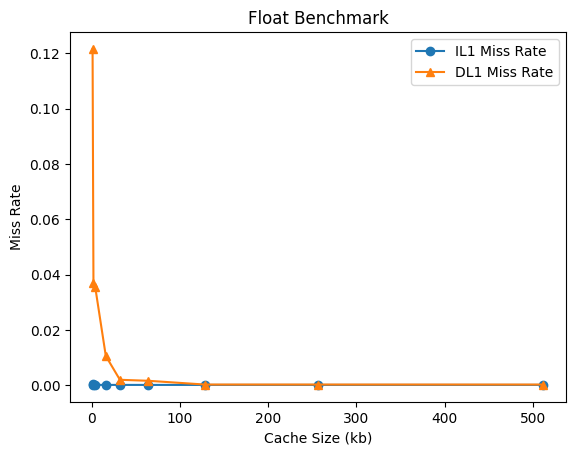

In [152]:
plt.plot(cache_sizes, average_icache_miss_rate, marker='o', label='IL1 Miss Rate')
plt.plot(cache_sizes, average_dcache_miss_rate, marker='^', label='DL1 Miss Rate')
plt.legend()
plt.xlabel('Cache Size (kb)')
plt.ylabel('Miss Rate')
plt.title('Float Benchmark')
plt.show()